# Проект: Исследование данных о российском кинопрокате

Заказчик этого исследования — Министерство культуры Российской Федерации. 
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from matplotlib import pyplot as plt 

In [2]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')   

df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
pd.options.display.float_format = '{:,.2f}'.format     

In [4]:
# Выводим первые 5 строчек датафрейма mkrf_movies
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
df_movies.shape

(7486, 15)

In [6]:
# Уточняем количество явных дубликатов
df_movies.duplicated().sum()

0

In [7]:
# Выводим первые 5 строчек датафрейма mkrf_shows
df_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [8]:
df_shows.shape

(3158, 2)

In [9]:
# Уточняем количество явных дубликатов
df_shows.duplicated().sum()

0

In [10]:
# Выводим основную информацию о датафреймах
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [11]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В датафрейме df_movies 7486 записи в 15 столбцах, в датафрейме df_shows 3158 записи в 2 столбцах. Явные дубликаты отсутствуют. В столбце puNumber разные типы данных, для корректного объединения изменим тип данных на int

In [12]:
# Проверим все символы в строке
df_movies[~df_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Исправим значения в столбце puNumber
#df_movies['puNumber'] = df_movies['puNumber'].replace(' ', '')
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors='coerce')
result = df_movies.loc[pd.isnull(df_movies['puNumber'])]

In [14]:
# В строке, где было значение 'нет' заменим на 0
#df_movies.loc[df_movies['puNumber'] == 'нет', 'puNumber'] = 0
df_movies = df_movies.dropna(subset=['puNumber'])

In [15]:
# Изменим тип данных
df_movies['puNumber'] = df_movies['puNumber'].astype(int)

In [16]:
# Объединим в один датафрейм и проверим
df_ms = df_movies.merge(df_shows, on='puNumber', how='left')
df_ms.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [17]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

# Вывод

Объединили данные в один датафрейм.

Разберём, какие в таблице столбцы и какую информацию содержат:

title — название фильма;

puNumber — номер прокатного удостоверения;

show_start_date — дата премьеры фильма;

type — тип фильма;

film_studio — студия-производитель;

production_country — страна-производитель;

director — режиссёр;

producer — продюсер;

age_restriction — возрастная категория;

refundable_support — объём возвратных средств государственной поддержки;

nonrefundable_support — объём невозвратных средств государственной поддержки;

financing_source — источник государственного финансирования;

budget — общий бюджет фильма;

ratings — рейтинг фильма на КиноПоиске;

genres — жанр фильма;

box_office — сборы в рублях.

Необходимо изменить в столбце show_start_date - тип даты и времени, а в ratings — рейтинг фильма на КиноПоиске - необходимый тип данных float.

Данных достаточно для исследования.

### Шаг 2. Предобработка данных

#### Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [18]:
# Измененим формат вывода даты и времени по столбцу show_start_date
df_ms['show_start_date'] = pd.to_datetime(df_ms['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [20]:
df_ms.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [21]:
# Посмотрим в столбце ratings уникальные значения
df_ms['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Непонятно, что именно означают числа с процентами, ведь стандарт для рейтинга - десятибалльная система. Возможно кто то не досмотрел до конца и произошла ошибка на сервере.

In [22]:
# Вернем десятибалльную систему
df_ms['ratings'] = df_ms['ratings'].replace('\%', '', regex = True)
df_ms['ratings']= df_ms['ratings'].astype('float64') 
df_ms.loc[df_ms['ratings'] > 10, 'ratings'] = df_ms['ratings']/10
df_ms['ratings'] = df_ms['ratings'].fillna(value=0)
df_ms['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [23]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

##### Промежуточный вывод

Изменен формат даты в столбце show_start_date на более удобный.
Изменили значения столбца ratings на десятибалльную систему.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [24]:
# Смотрим пропущенные значения
# df_ms.isna().sum()
df_ms.isnull().sum()*100/len(df_ms)

title                    0.00
puNumber                 0.00
show_start_date          0.00
type                     0.00
film_studio              0.24
production_country       0.03
director                 0.12
producer                 7.59
age_restriction          0.00
refundable_support      95.56
nonrefundable_support   95.56
budget                  95.56
financing_source        95.56
ratings                  0.00
genres                  13.03
box_office              57.81
dtype: float64

В film_studio: 18 пропусков;

В production_country: 2 пропуска;

В director: 9 пропусков;

В producer - 568 пропусков;

В refundable_support, nonrefundable_support, budget, financing_source: 7154 пропуска;

В ratings: 967 пропусков; 

В genres: 976 пропусков;

В box_office: 4328 пропусков.

In [25]:
df_ms[df_ms['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,"41,225.00"
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN


Как видим, в этом столбце преобладает авторское кино. Вероятнее всего кино спонсировала не студия-производитель, а сами авторы (продюсер, режиссер).

In [26]:
# Заполним отсутствующие данные на Без студии.
df_ms['film_studio'] = df_ms['film_studio'].fillna(value='Без студии')

In [27]:
df_ms[df_ms['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Без студии,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Всего два пропуска, добавим к ним страну.

In [28]:
df_ms.loc[df_ms['production_country'].isna() == True, 'production_country'] = 'Россия'
len(df_ms.loc[df_ms['production_country'].isna() == True])

0

In [29]:
df_ms[df_ms['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Без студии,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Пропусков не так много, возможно режиссеры добровольно отказывались от упоминания ради концептуальной идеи. Или бывало отказывались от своей работы из-за конфликта с продюсерами, которые сделали итоговый монтаж отснятого материала самостоятельно, без учета мнения автора. Либо остались анонимом из за определенных обстоятельств. Пропуски заменим на неизвестно.

In [30]:
# Заполним отсутствующие данные на Неизвестно
df_ms['director'] = df_ms['director'].fillna(value='Неизвестно')

In [31]:
df_ms[df_ms['producer'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7405,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7406,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7407,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


In [32]:
# Заполним отсутствующие данные на Неизвестно
df_ms['producer'] = df_ms['producer'].fillna(value='Неизвестно')

Скорее всего тут возникли пропуски из за того, что режиссер взял на себя роль и продюссера и оператора. Пропуски заменим на неизвестно.

В refundable_support, nonrefundable_support, budget, financing_source: 7154 пропуска. Так как, в описании написано, что эти данные указаны только для тех фильмов, которые получили государственную поддержку и бюджет этих фильмов указан с учетом государственной поддержки. Получается, что данные фильмы не были профинансированы государством. Количество пропущенных значений одинаковы по данным столбцам, пропуски заменим на 0.

In [33]:
# не рекомендуется
# # Заполним отсутствующие данные на 0
# df_ms['refundable_support'] = df_ms['refundable_support'].fillna(value=0)
# df_ms['nonrefundable_support'] = df_ms['nonrefundable_support'].fillna(value=0)
# df_ms['budget'] = df_ms['budget'].fillna(value=0)

In [34]:
df_ms[df_ms['financing_source'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.00,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,NaN,NaN


In [35]:
# Заполним отсутствующие данные на Коммерческий
df_ms['financing_source'] = df_ms['financing_source'].fillna(value='Коммерческий')

In [36]:
df_ms[df_ms['ratings'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Для формирования рейтинга на Кинопоиске недостаточно оценок у фильмов, оставим как есть.

In [37]:
df_ms[df_ms['genres'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,"219,569.00"
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Коммерческий,0.00,NaN,NaN


Классифицировать довольно трудно, так как кино – многослойный, многогранный феномен. Пропуски заменим на неизвестно.

In [38]:
# Заполним отсутствующие данные на Неизвестно
df_ms['genres'] = df_ms['genres'].fillna(value='Неизвестно')

In [39]:
df_ms[df_ms['box_office'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Коммерческий,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Коммерческий,0.00,Неизвестно,NaN
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,5.40,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Коммерческий,0.00,Неизвестно,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Коммерческий,0.00,Неизвестно,NaN


In [40]:
# Заполним отсутствующие данные на 0
df_ms['box_office'] = df_ms['box_office'].fillna(value=0)

##### Промежуточный вывод

В столбце production_country всего два пропуска, добавили к ним страну - Россия .

В столбцах 'director', 'producer', 'genres' - заменили пропуски на "неизвестно".




Спасибо за подсказку.
(Столюцах refundable_support, nonrefundable_support, budget, box_office  - заменили пропуски на 0.)(Столюцах refundable_support, nonrefundable_support, budget, box_office  - заменили пропуски на 0.)

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [41]:
# Уточняем количество явных дубликатов
df_ms.duplicated().sum()

0

In [42]:
df_ms.nunique()

title                    6771
puNumber                 7483
show_start_date          1964
type                        8
film_studio              5491
production_country        950
director                 4812
producer                 5350
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    85
genres                    743
box_office               2938
dtype: int64

In [43]:
# Попробуем найти фильмы, которые могли задублироваться
df_ms[df_ms.duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director'], keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,Эпидемия_,121025713,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.20,"драма,фантастика,триллер",0.00
1301,Эпидемия_,221035513,2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.20,"драма,фантастика,триллер",0.00
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,3.50,"комедия,приключения",0.00
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,3.50,"комедия,приключения",0.00
2190,Последние пять лет.,221008115,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,5.70,"мюзикл,драма,мелодрама",0.00
2191,Последние пять лет.,121005715,2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,5.70,"мюзикл,драма,мелодрама","52,495.00"
2751,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Коммерческий,5.20,"мультфильм,семейный,спорт","1,360.00"
2752,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Коммерческий,5.20,"мультфильм,семейный,спорт","14,152,495.90"
3085,Анархисты,221003916,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,5.70,драма,0.00
3086,Анархисты,121002316,2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,5.70,драма,"332,371.00"


Обнаружилось 16 повторяющихся фильмов. У них указаны разные прокатные удостоверения, оставим как есть. Возможно, эти фильмы шли в прокат последовательно или на разных площадках.

In [44]:
df_ms[df_ms.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.00,"мелодрама,комедия",0.00
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.60,"драма,мелодрама,история",0.00
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.40,"комедия,криминал",0.00
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Коммерческий,6.80,"комедия,криминал",0.00


Вероятнее всего произошла ошибка с выдачей прокатного удостоверения.
Фильм "Анализируй то", который имеет идентичный с фильмом "Анализируй это" прокатный номер 221054410 получит новый свободный номер: 100000000.

Для фильма "Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс" тоже присвоим новый свободный номер: 100000001

In [45]:
df_ms.loc[(df_ms['title'] == 'Анализируй то!') & (df_ms['puNumber'] == 221054410), 'puNumber'] = 100000000

In [46]:
df_ms.loc[(df_ms['title'] == 'Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/') & (df_ms['puNumber'] == 221154310), 'puNumber'] = 100000001

In [47]:
df_ms[df_ms.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


##### Промежуточный вывод

Явные дубликаты отсутствуют.
Обнаружилось 16 повторяющихся фильмов. У них указаны разные прокатные удостоверения, оставили как есть. Возможно, эти фильмы шли в прокат последовательно или на разных площадках.
Были заменены номера прокатного удостоверения у фильмов с одинаковыми прокатными удостоверениями.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [48]:
# Удалим из столбца type лишние пробелы
df_ms['type'] = df_ms['type'].str.strip()

In [49]:
# Посмотрим перечень уникальных значений столбца type
df_ms['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [50]:
# Посмотрим перечень уникальных значений столбца production_country
df_ms['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [51]:
# Посмотрим перечень уникальных значений столбца age_restriction
df_ms['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [52]:
# Посмотрим перечень уникальных значений столбца director
df_ms['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [53]:
# Посмотрим перечень уникальных значений столбца producer
df_ms['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'Неизвестно',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [54]:
# Посмотрим перечень уникальных значений столбца financing_source
df_ms['financing_source'].unique()

array(['Коммерческий', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [55]:
# Посмотрим перечень уникальных значений столбца genres
df_ms['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

In [56]:
# Уберем лишние пробелы
df_ms['genres'] = df_ms['genres'].str.strip()
df_ms['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

In [57]:
categorical_columns = ['type','production_country', 
           'director', 'producer', 'age_restriction',
           'financing_source', 'genres']

for column in categorical_columns:
    display(pd.DataFrame(df_ms[column].value_counts().head(5)))

,type
Художественный,5908
Анимационный,829
Прочие,406
Документальный,288
Научно-популярный,53


,production_country
США,2172
Россия,1822
СССР,347
Франция,301
Великобритания,257


,director
О.Семёнова,47
Стивен Содерберг,17
Д.Червяцов,17
Ридли Скотт,16
Тиль Швайгер,14


,producer
Неизвестно,568
П.Смирнов,67
"Олег Кузовков, Дмитрий Ловейко, Марина Ратина",28
С.Сельянов,18
"Д.Ловейко, О.Кузовков",17


,age_restriction
«16+» - для детей старше 16 лет,2851
«18+» - запрещено для детей,1605
«12+» - для детей старше 12 лет,1592
«0+» - для любой зрительской аудитории,811
«6+» - для детей старше 6 лет,626


,financing_source
Коммерческий,7153
Министерство культуры,164
Фонд кино,146
"Министерство культуры, Фонд кино",22


,genres
Неизвестно,975
драма,476
комедия,352
"мелодрама,комедия",222
"драма,мелодрама,комедия",189


##### Промежуточный вывод

Удалили из столбцов type и genres лишние пробелы.
Наблюдаем, что почти во всех столбцах присутствуют неизвестные значения. Также мы видим, что столбцы: 'production_country' - страна происхождения, 'producer' - продюсер, 'genres' - жанр, содержат множественные значения строк, в которых обычно рекомендуют считать, что первое указанное значение и есть главный показатель. Часть категориальных значений, например, данные в столбцах 'director', 'producer', 'genres' были обработаны выше, там общей проблемой являлись пропуски.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

В столбце budget содержатся данные которые получили государственную поддержку. Рассмотрим их в разрезе соотношения с двумя другими объём возвратных средств государственной поддержки refundable_support и объём невозвратных средств государственной поддержки nonrefundable_support.

In [58]:
# Посмотрим фильмы, которые были сняты при государственной поддержке, но по кассовым сборам у них 0
df_ms.query('refundable_support > 0 and nonrefundable_support > 0 and budget > 0 and box_office == 0' )

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",0.00
7477,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",Фонд кино,4.50,"комедия,фантастика,мелодрама",0.00


Две кинокартины в которых не указаны кассовые сборы. Может они и вовсе не выходили в прокат либо только вышли на тот момент.

In [59]:
# посмотрим фильмы, у которых бюджет может быть меньше, чем сумма возвратных и невозвратных средств.
df_ms_sum = df_ms[df_ms['budget'] < (df_ms['refundable_support'] + df_ms['nonrefundable_support'])]
df_ms_sum

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Видим, что существуют фильмы с нулевым бюджетом. Предположим, что процент поддержки всегда примерно одинаков и мы можем заменить эту сумму медианным процентом от поддержки. 

In [60]:
# Рассчитаем медиану
df_ms_median  = round(df_ms.eval('(refundable_support + nonrefundable_support) / budget').median(), 2)
df_ms_median * 100

61.0

Процент государственной поддержки равен 61%.

In [61]:
# заполним пропущенные значения
df_ms.loc[df_ms_sum.index, 'budget'] = (df_ms.loc[df_ms_sum.index, 'refundable_support'] + df_ms.loc[df_ms_sum.index, 'nonrefundable_support']) / df_ms_median
df_ms.loc[df_ms_sum.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","37,704,918.03","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","122,950,819.67",Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","131,147,540.98",Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"32,786,885.25",Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","262,295,081.97",Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","96,721,311.48",Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","57,377,049.18",Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","9,836,065.57",Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","114,754,098.36",Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","409,836,065.57",Фонд кино,5.60,фантастика,"1,038,321,489.00"


Наблюдаем, что такие картины присутствуют. Исправим в них бюджет на сумму возвратных и невозвратных средств. Для этого напишем функцию.

##### Промежуточный вывод

Существуют фильмы с нулевым бюджетом.

Были заменены нулевые значения бюджета.


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [62]:
# Добавляем столбец rental_year (год проката)
df_ms['rental_year'] = df_ms['show_start_date'].dt.year
df_ms.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,7.20,"боевик,драма,мелодрама",0.00,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Коммерческий,6.60,"драма,военный",0.00,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",0.00,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",0.00,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",0.00,2015


Наблюдаем дубли фильмов с разными прокатными удостоверениями, предполагаю они перезапускались в прокат в разное время.

In [63]:
df_ms.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office', 'rental_year'],
      dtype='object')

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [64]:
# Добавляем функцию и применим к двум столбцам
df_ms['main_director'] = df_ms['director'].str.split(",").str[0]
df_ms['main_genre'] = df_ms['genres'].str.split(",").str[0]
df_ms['main_director'] = df_ms['main_director'].str.strip()
df_ms['main_genre'] = df_ms['main_genre'].str.strip()

In [65]:
df_ms.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office', 'rental_year',
       'main_director', 'main_genre'],
      dtype='object')

In [66]:
df_ms.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,7.20,"боевик,драма,мелодрама",0.00,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Коммерческий,6.60,"драма,военный",0.00,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",0.00,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",0.00,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",0.00,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [67]:
# Исследуем какую долю от общего бюджета фильма составляет государственная поддержка
df_ms['gos_support'] = (df_ms['refundable_support'] + df_ms['nonrefundable_support']) / df_ms['budget']*100

In [68]:
df_ms['gos_support'] = df_ms['gos_support'].map('{:,.3f}'.format)

In [69]:
df_ms[df_ms['gos_support'] != 'nan']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year,main_director,main_genre,gos_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,33.370
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,0.00,Неизвестно,"28,140.00",2014,А.Якимчук,Неизвестно,70.000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,61.269
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.009
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,62.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53",2019,А.Кравчук,история,51.020
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00",2019,Д.Шмидт,мультфильм,52.632
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",0.00,2019,Ф.Бондарчук,фантастика,52.966
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,0.00,2019,И.Северов,драма,65.000


In [70]:
# Посмотрим изменения
df_ms['gos_support'].unique()

array(['nan', '33.370', '70.000', '61.269', '69.009', '62.476', '48.216',
       '68.000', '53.941', '53.744', '68.947', '35.273', '27.724',
       '37.378', '61.000', '50.121', '12.964', '62.963', '65.702',
       '66.657', '21.000', '12.000', '40.976', '25.000', '66.896',
       '67.995', '69.767', '38.759', '52.738', '22.193', '33.671',
       '68.993', '69.287', '42.581', '36.235', '62.036', '65.331',
       '69.910', '17.784', '69.840', '36.147', '66.268', '67.517',
       '66.392', '43.055', '68.298', '69.000', '32.432', '60.244',
       '63.778', '62.248', '62.460', '29.918', '69.500', '64.974',
       '55.556', '36.759', '68.718', '62.287', '69.444', '48.232',
       '69.996', '67.122', '36.098', '34.069', '66.667', '62.592',
       '59.316', '37.313', '59.226', '16.992', '59.525', '43.485',
       '54.002', '64.103', '35.135', '43.331', '67.147', '33.048',
       '69.592', '66.510', '64.935', '52.673', '36.894', '65.449',
       '33.848', '50.084', '67.662', '64.991', '48.352'

In [71]:
# Изменит тип
df_ms['gos_support'] = df_ms['gos_support'].astype('float64')

In [72]:
df_ms['gos_support'].median()

61.0

##### Промежуточный вывод

Добавил сболбцы для отображения корректных данных: rental_year (год проката); main_director (с именем и фамилией главного режиссёра); main_genre (основным жанром фильма).

Доля государственной поддержки от общего бюджета фильмов состовляет 61%.


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [73]:
# Создадим сводную таблицу
df_ms_pivot = df_ms.query('box_office > 0').pivot_table(index='rental_year', values='box_office', aggfunc=['count', 'sum', 'mean', 'median'])
df_ms_pivot = df_ms_pivot.set_axis(['Вышло в прокат', 'Сумма', 'Среднее', 'Медиана'], axis='columns')
df_ms_pivot['Фильмов за год'] = df_ms.pivot_table(index='rental_year', values='box_office', aggfunc='count')['box_office']
df_ms_pivot['Процент проката'] = df_ms_pivot['Вышло в прокат'] / df_ms_pivot['Фильмов за год']  * 100
display(df_ms_pivot.loc[:, ['Вышло в прокат', 'Фильмов за год', 'Процент проката']])

,Вышло в прокат,Фильмов за год,Процент проката
rental_year,,,
2010,101,985,10.25
2011,109,622,17.52
2012,123,593,20.74
2013,179,630,28.41
2014,273,806,33.87
2015,462,705,65.53
2016,525,818,64.18
2017,357,505,70.69
2018,475,891,53.31


Как видим, если сравнить 2010-2013г, то с 2014 по 2019 значительно увеличилось количество фильмов, которые выходили в прокат.

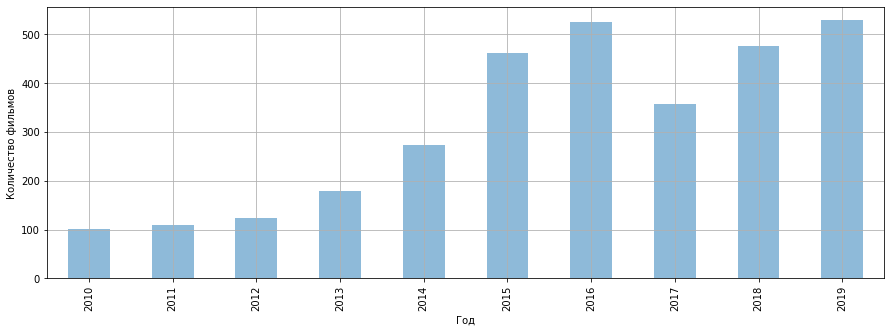

In [74]:
df_ms_pivot.plot(kind='bar', y='Вышло в прокат', figsize=(15, 5), grid=True, legend=False, alpha=0.5);
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.show()

In [75]:
display('Общая доля фильмов с информацией о прокате составляет %:', round(df_ms.query('box_office > 0')['box_office'].count() / df_ms['box_office'].count() * 100, 2))

'Общая доля фильмов с информацией о прокате составляет %:'

41.87

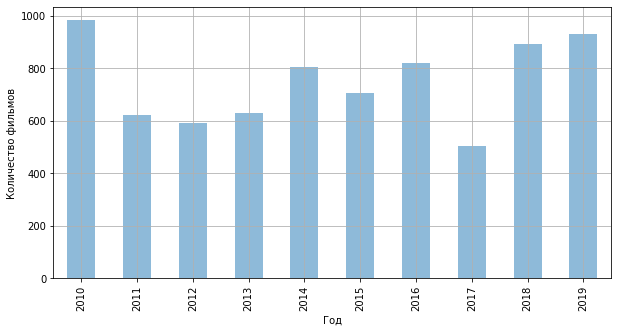

In [76]:
df_ms_pivot.plot(kind='bar', y='Фильмов за год', figsize=(10, 5), grid=True, legend=False, alpha=0.5);
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.show()

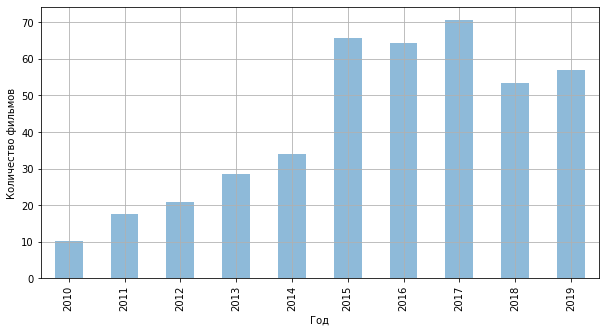

In [77]:
df_ms_pivot.plot(kind='bar', y='Процент проката', figsize=(10, 5), grid=True, legend=False, alpha=0.5);
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.show()

Наблюдаем, что с 2014 по 2019 значительно увеличилось производство в киноиндустрии колличества фильмов, которым выдавались прокатные удостоверения в целом. В 2017 видим был резкий спад. Возможно, спад мог быть связан из-за скачка инфляции и это довольно сильно отразилось на ценах на билеты, и значительно ограничило количество посещений и как следствие сборы. 
В 2019 значения вернулись в норму 2016 год.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

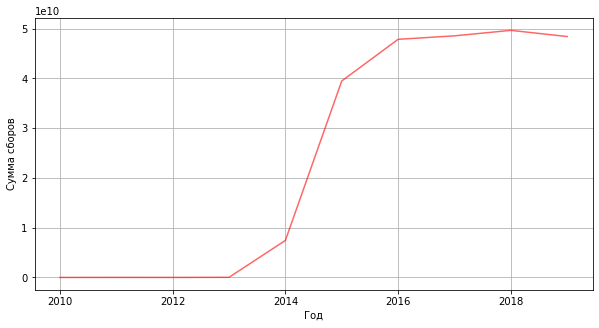

In [78]:
df_ms_pivot.plot(kind='line', y='Сумма', figsize=(10, 5), legend=False, grid=True, color='red', alpha=0.6)
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.show()

In [79]:
df_ms_pivot['Сумма'].idxmin()

2010

In [80]:
df_ms_pivot['Сумма'].idxmax()

2018

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [81]:
display(df_ms_pivot.loc[:, ['Среднее', 'Медиана']])

,Среднее,Медиана
rental_year,,
2010,"24,046.08","1,710.00"
2011,"129,383.17","3,000.00"
2012,"56,548.15","6,220.00"
2013,"166,478.81","3,580.00"
2014,"27,270,885.93","20,400.00"
2015,"85,492,132.46","5,003,450.15"
2016,"91,173,904.27","3,915,041.02"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


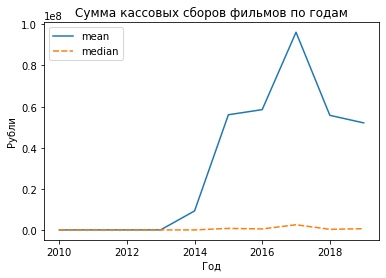

In [82]:
sbn.lineplot(data=df_ms.groupby('rental_year')['box_office'].agg(['mean', 'median']))
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Рубли');
plt.show()

С увеличением производимых фильмов, видим, что начиная с 2013по 2017 сумма за сборы увеличивались. C 2017-2019 сумма сборов пошла на спад. Довольно большой разброс данных, это видно из разницы между средней и медианой.  На графике видим, что самый прибыльный год был 2017. Вероятнее всего выходил какой нибудь блокбастер.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [83]:
df_ms.query('2015 <= rental_year').groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории      809,077,425.97
«18+» - запрещено для детей              40,759,615,572.12
«6+» - для детей старше 6 лет            55,798,610,799.68
«12+» - для детей старше 12 лет          60,619,446,628.33
«16+» - для детей старше 16 лет          76,034,733,643.63
Name: box_office, dtype: float64

In [84]:
age = df_ms.query('2015 <= rental_year').groupby(['rental_year', 'age_restriction'])['box_office'].agg('mean').reset_index()

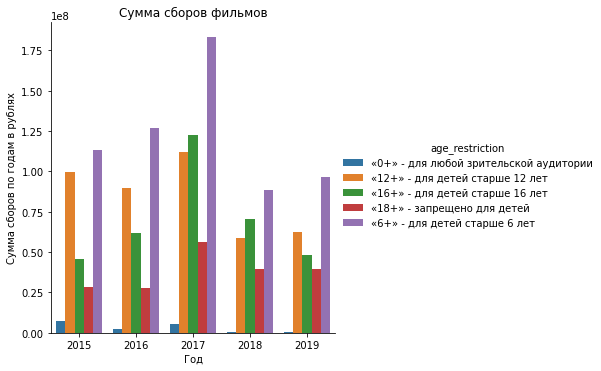

In [85]:
df_ms_age = sbn.catplot(x='rental_year', y='box_office', hue='age_restriction', data=age, kind='bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');

##### Промежуточный вывод

В прокате фильмы с возрастным ограничением «0+» - для любой зрительской аудитории  набрали меньше всего средств.
Больше всего средств собрали фильмы с возрастным ограничением «6+» — для детей старше 6 лет. Мультфильмы всегда в тренде.
На втором месте фильмы с для детей старше 12 лет - 12+. Тут вероятнее всего преобладали Сказки.

Из представленных данных и полученных результатов можно заключить, что за период с 2015 по 2019 годы киноиндустрия продолжала свой рост, с увеличением числа произведенных фильмов и объема инвестиций. Ведущую позицию занимали фильмы с рейтингом «6+», однако в 2018 году они как видим утспупили аудитории 12+, возможно это произошло, из-за насыщенности рынка. В 2019 году первое место по сборам заняли фильмы, пригодные для просмотра зрителями 6+.


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [86]:
df_ms_budget = df_ms[df_ms['budget'].isna() == False].copy()
len(df_ms_budget)

332

In [87]:
display('Количество прокатных удостоверений у фильмов с гос.поддержкой:', len(df_ms_budget['puNumber']))
display('Количество уникальных фильмов с гос.поддержкой:', len(df_ms_budget['title'].unique()))

'Количество прокатных удостоверений у фильмов с гос.поддержкой:'

332

'Количество уникальных фильмов с гос.поддержкой:'

332

In [88]:
#  добавим два столбца Full_support (сумма государственной поддержки) и profit (сборы за вычетом бюджета)
df_ms_budget['Full_support'] = df_ms['refundable_support'] + df_ms['nonrefundable_support']
df_ms_budget['profit'] = df_ms['box_office'] - df_ms['budget']

In [89]:
df_ms_budget.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,rental_year,gos_support,Full_support,profit
count,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00,332.00
mean,"111,593,819.10","11,864,457.83","48,980,988.89","134,102,961.13",5.73,"126,847,920.41","2,016.72",52.21,"60,845,446.72","-7,255,040.72"
std,"5,703,031.32","24,916,555.26","59,980,117.92","187,704,453.15",1.71,"328,762,573.57",1.64,16.69,"72,755,459.47","312,606,379.32"
min,"111,000,115.00",0.00,0.00,"9,836,065.57",0.00,0.00,"2,013.00",4.40,"3,000,000.00","-1,971,477,243.41"
25%,"111,004,891.50",0.00,"25,000,000.00","46,153,971.75",5.20,"909,431.25","2,015.00",38.46,"25,333,750.00","-72,031,772.25"
50%,"111,010,367.00",0.00,"30,000,000.00","74,592,550.00",6.10,"12,144,193.50","2,017.00",61.00,"35,000,000.00","-43,450,512.09"
75%,"111,017,815.75","15,000,000.00","40,375,000.00","150,002,143.25",6.70,"103,107,405.69","2,018.00",65.46,"60,000,000.00","-13,508,825.62"
max,"214,010,116.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.40,"3,073,568,690.79","2,019.00",78.47,"500,000,000.00","2,913,568,690.79"


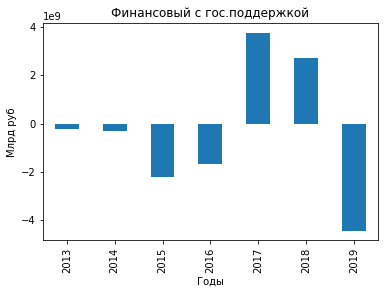

In [90]:
# Построим  график, отражающий прибыльность фильмов с гос.поддержкой по годам:
df_ms_budget.groupby('rental_year')['profit'].sum().plot(kind='bar', grid=False)
plt.title('Финансовый с гос.поддержкой')
plt.xlabel('Годы')
plt.ylabel('Млрд руб');

Как видим, с 2013 по 2016 и 2019 картины с государственной поддержкой были провальны, 2017 - 2018 принесли неплохую прибыль, скорее всего в 2017г выходил в прокат блокбастер, который смог преодолеть планку сборов 2,9 млд. руб.
Не смотря на такие всплески, в целом субсидируемые фильмы убыточны.

In [91]:
df_ms_budget.groupby('rental_year')['Full_support'].count()

rental_year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: Full_support, dtype: int64

In [92]:
# Уберем 2013 -2014г - так как слишком мало данных
df_ms_budget = df_ms_budget[df_ms_budget['rental_year'] > 2014]

In [93]:
df_ms_budget.groupby('rental_year')['Full_support'].sum()

rental_year
2015   3,656,241,459.00
2016   4,303,155,482.00
2017   3,183,971,662.00
2018   3,446,969,465.00
2019   4,904,000,000.00
Name: Full_support, dtype: float64

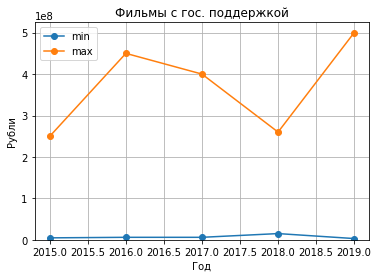

In [94]:
df_ms_budget.groupby('rental_year')['Full_support'].agg(
    ['min', 'max']).plot(grid=True, ylim=0, style='o-');
plt.title('Фильмы с гос. поддержкой');
plt.xlabel('Год');
plt.ylabel('Рубли');

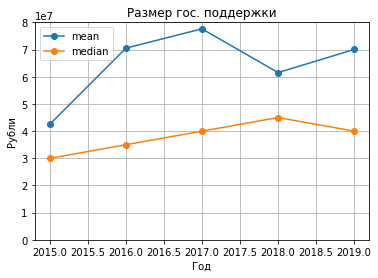

In [95]:
df_ms_budget.groupby('rental_year')['Full_support'].agg(
    ['mean', 'median']).plot(grid=True, ylim=0, style='o-');
plt.title('Размер гос. поддержки');
plt.xlabel('Год');
plt.ylabel('Рубли');

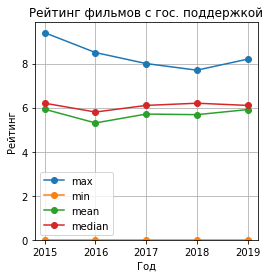

In [96]:
df_ms_budget.groupby('rental_year')['ratings'].agg(
    ['max', 'min', 'mean', 'median']).plot(grid=True, ylim=0, style='o-', figsize=(4, 4))
plt.title('Рейтинг фильмов с гос. поддержкой');
plt.xlabel('Год');
plt.ylabel('Рейтинг');

По графикам видно, если смотреть на среднее арифметическое, то здесь тоже в основном на графике провал. Как видим, больше всего поддержки было в 2019 году, а меньше всего в 2018 году. Если смотреть сумму поддержки на каждый фильм, то в 2017 году была самая большая выделенная сумма.

In [97]:
# Выведем имена главных режиссеров, чьи фильмы получили максимальные оценки зрителей, а также их жанры:
(df_ms_budget.query('ratings > 7')
    .groupby(['main_director', 'main_genre'])['ratings']
    .count()
    .sort_values(ascending=False)
    .head(10))

main_director                      main_genre
Р.Давлетьяров                      драма         2
Р.Артемьев (псев.С.Васильев)       детектив      1
М.Демченко                         детский       1
М.Михайлова                        драма         1
М.Морсков                          фэнтези       1
Н.Бондарчук                        мюзикл        1
Н.Лебедев                          драма         1
Н.Степанова при участии С.Иванова  драма         1
П.Руминов                          драма         1
П.Сидоров                          ужасы         1
Name: ratings, dtype: int64

In [98]:
# Посмотрим предпочтения по жанрам которым выдавалась гос.поддержка
(df_ms_budget
    .pivot_table(index= 'main_genre', values = ['Full_support'])
    .sort_values(by='Full_support',ascending=False)
    .head(10))

,Full_support
main_genre,
история,"255,000,000.00"
спорт,"151,666,666.67"
фантастика,"138,100,000.00"
приключения,"99,428,571.43"
детектив,"97,000,000.00"
фэнтези,"93,900,000.00"
криминал,"93,333,333.33"
мультфильм,"79,717,333.33"
мюзикл,"60,113,279.75"


In [99]:
# Посмотрим топ 10 режиссеров которым выдавалась гос.поддержка
(df_ms_budget
    .pivot_table(index= 'director', values = ['Full_support'])
    .sort_values(by='Full_support',ascending=False)
    .head(10))

,Full_support
director,
Ф.Бондарчук,"500,000,000.00"
А.Кравчук,"500,000,000.00"
А.Мизгирев,"450,000,000.00"
Н.Лебедев,"442,104,482.00"
А.Мегердичев,"400,000,000.00"
И.Шурховецкий,"350,000,000.00"
А.Учитель,"300,000,000.00"
О.Степченко,"270,000,000.00"
Д.Козловский,"260,000,000.00"


In [100]:
# Посмотрим топ 10 режиссеров которые принесли прибыль государству.
(df_ms_budget
    .pivot_table(index= 'director', values = ['profit'])
    .sort_values(by='profit',ascending=False)
    .head(10))

,profit
director,
А.Мегердичев,"2,189,493,953.00"
А.Сидоров,"1,707,969,287.52"
К.Шипенко,"1,586,257,255.39"
О.Трофим,"1,297,146,575.89"
Н.Лебедев,"766,971,523.00"
"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпиловский, А.Черномазов (А.Нужный)","681,069,130.00"
Ф.Бондарчук,"628,485,423.43"
К.Феоктистов,"584,762,378.00"
А.Першин (псевдоним Ж.Крыжовников),"552,409,725.40"


При распределении государственной поддержки по жанрам, предпочтения отдаются историческим художественным фильмам, спортивному обозрению  и фантастике. А режиссеры Р.Давлетьяров, Р.Артемьев (псев.С.Васильев), Н.Бондарчук, М.Морсков  помимо получения гос.субсидий получают еще и любовь зрителей, их фильмы оцениваются в среднем выше остальных.
Отдельно отметим, больше всего субсидий получили:  Ф.Бондарчук, А.Кравчук., А.Мизгирев, Н.Лебедев.
Больше всего принесли прибыль государству: А.Мегердичев, тут осмелюсь предположить: это фильм Движение вверх (2017г)., К.Шипенко - фильмы Холоп, Салют-7; О.Трофим - фильм Лед.



### Шаг 5. Напишите общий вывод

В процессе исследования данных о российском кинопрокате были выполнены следующие этапы и сделаны выводы.

##### Изучили общую информацию:

* Объединили данные в один датафрейм.
* В датафрейме df_movies 7486 записи в 15 столбцах, в датафрейме df_shows 3158 записи в 2 столбцах. 
* В столбце puNumber разные типы данных, для корректного объединения изменим тип данных на int
* Необходимо изменить в столбце show_start_date - тип даты и времени, а в ratings — рейтинг фильма на КиноПоиске - необходимый тип данных float.


#####  Выполнена предобработка данных:

* Изменен формат даты в столбце show_start_date (дата) на более удобный.
* Изменили значения столбца ratings (рейтинг) на десятибалльную систему.
* В столбце production_country (страна производста) всего два пропуска, добавили к ним страну - Россия .
* В столбцах 'director' (режиссер), 'producer' (продюссер) , 'genres' (жанр) - заменили пропуски на "неизвестно".
* Явные дубликаты отсутствуют.Обнаружилось 16 повторяющихся фильмов. У них указаны разные прокатные удостоверения, оставили как есть. Возможно, эти фильмы шли в прокат последовательно или на разных площадках. Были заменены номера прокатного удостоверения у фильмов с одинаковыми прокатными удостоверениями.
* Удалили из столбцов type (тип) и genres (жанр) лишние пробелы.
* Существуют фильмы с нулевым бюджетом. 
* Были заменены нулевые значения budget (бюджета).
* Добавил сболбцы для отображения корректных данных: rental_year (год проката); main_director (с именем и фамилией главного режиссёра); main_genre (основным жанром фильма).
* Доля государственной поддержки от общего бюджета фильмов состовляет 61%


#####  Проведен исследовательский анализ данных:

* Как видим, с 2013 по 2016 и 2019 картины с государственной поддержкой были провальны, 2017 - 2018 принесли неплохую прибыль, скорее всего в 2017г выходил в прокат блокбастер, который смог преодолеть планку сборов 2,9 млд. руб. Не смотря на такие всплески, в целом субсидируемые фильмы убыточны.

* Наблюдаем, что с 2010 по 2019 значительно увеличилось производство в киноиндустрии колличества фильмов, которым выдавались прокатные удостоверения в целом. В 2017 видим был резкий спад. Возможно, спад мог быть связан из-за скачка инфляции и это довольно сильно отразилось на ценах на билеты, и значительно ограничило количество посещений и как следствие сборы. В 2019 значения вернулись в норму 2016 год.

* С увеличением производимых фильмов, видим, что начиная с 2013по 2017 сумма за сборы увеличивались. C 2017-2019 сумма сборов пошла на спад. Довольно большой разброс данных, это видно из разницы между средней и медианой.  На графике видим, что самый прибыльный год был 2017. Вероятнее всего выходил какой нибудь блокбастер.

* В прокате фильмы с возрастным ограничением «0+» - для любой зрительской аудитории  набрали меньше всего средств.
* Больше всего средств собрали фильмы с возрастным ограничением «6+» — для детей старше 6 лет. Мультфильмы всегда в тренде.
* На втором месте фильмы с для детей старше 12 лет - 12+. Тут вероятнее всего преобладали Сказки. 
* Из представленных данных и полученных результатов можно заключить, что за период с 2015 по 2019 годы киноиндустрия продолжала свой рост, с увеличением числа произведенных фильмов и объема инвестиций. Ведущую позицию занимали фильмы с рейтингом «6+», однако в 2018 году они как видим утспупили аудитории 12+, возможно это произошло, из-за насыщенности рынка. В 2019 году первое место по сборам заняли фильмы, пригодные для просмотра зрителями 6+.

* Как видим, с 2013 по 2016 и 2019 картины с государственной поддержкой были провальны, 2017 - 2018 принесли неплохую прибыль, скорее всего в 2017г выходил в прокат блокбастер, который смог преодолеть планку сборов 2,9 млд. руб. Не смотря на такие всплески, в целом субсидируемые фильмы убыточны.
* По графикам видно, если смотреть на среднее арифметическое, то здесь тоже в основном на графике провал. Как видим, больше всего поддержки было в 2019 году, а меньше всего в 2018 году. Если смотреть сумму поддержки на каждый фильм, то в 2017 году была самая большая выделенная сумма.

* При распределении государственной поддержки по жанрам, предпочтения отдаются историческим художественным фильмам, спортивному обозрению  и фантастике. А режиссеры Р.Давлетьяров, Р.Артемьев (псев.С.Васильев), Н.Бондарчук, М.Морсков  помимо получения гос.субсидий получают еще и любовь зрителей, их фильмы оцениваются в среднем выше остальных.

* Отдельно отметим, больше всего субсидий получили:  Ф.Бондарчук, А.Кравчук., А.Мизгирев, Н.Лебедев.
* Больше всего принесли прибыль государству: А.Мегердичев, тут осмелюсь предположить: это фильм Движение вверх (2017г)., К.Шипенко - фильмы Холоп, Салют-7; О.Трофим - фильм Лед.

В мире киноиндустрии не все так однозначно. Фильмы, в среднем, не окупаются, но при этом государственный фонд все равно в прибыли за счет хитов. При этом хиты могут иметь так себе оценки (средние), но все же приносить прибыль. Большего всего фильмов при поддержке снято в жанре "история", на втором месте - "спорт". 
